## LBP (Implemented)


In [7]:
from skimage.feature import local_binary_pattern
import skimage.exposure.histogram
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def LBP_implemented (img, stride = 1):
    newImg = np.zeros((img.shape[0], img.shape[1]))
    coordX, coordY = [-1, -1, -1, 0, 1, 1, 1, 0], [-1, 0, 1, 1, 1, 0, -1, -1]
    for i in range(stride, img.shape[0]-stride):
        for j in range(stride, img.shape[1]-stride):
            c = 0
            for k in range(8):
                if img[i+coordX[k], j+coordY[k]] >= img[i,j]:
                    c += 2**(7-k)
            newImg[i,j] = c
    return newImg[stride : newImg.shape[0]-stride, stride : newImg.shape[1]-stride]

In [9]:
def histogram_implemented(img):
    hist = np.zeros(256)
    img = img.astype(int)
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i,j]] += 1
    return(hist)

In [54]:
#Built-in LBP and Histogram functions

def LBP (images, stride = 1):
    hist = np.zeros(256)
    for img in images:
        lbp = local_binary_pattern(img, 8, 1)   #‘default’, ‘ror’, ‘uniform’, ‘var’, nri_uniform
        hist += np.asarray(histogram(lbp)).astype(int)
    return hist

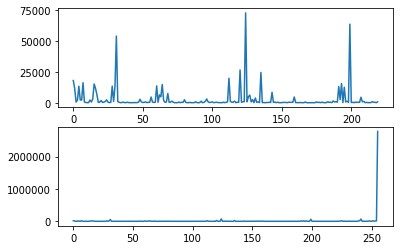

In [55]:
a1 = io.imread('1/1.png')
a1 = a1[910:1750, 240:-90, 0]
a2 = io.imread('1/2.png')
a2 = a2[910:1750, 240:-90, 0]
hist = LBP([a1, a2])
fig, axs = plt.subplots(2)
axs[0].plot(hist[:220])
axs[1].plot(hist)